In [54]:
import numpy as np
from pathlib import Path

from pymor.basic import *
from pymor.core.pickle import load

from RBInvParam.problems.problems import build_InstationaryModelIP

set_log_levels({
    'pymor' : 'WARN'
})

set_defaults({})


In [68]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cm",
    "font.size": 10,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'figure.dpi': 400
})

In [62]:
WORK_DIR = Path('/run/media/benedikt/38E84473425D444F/Dokumente/Studium/Mathematik/PhD/parabolische_inverse_probleme')
method = 'TR_IRGNM'
dump_path = WORK_DIR / Path('examples/diffusion/dumps') / f'20250131_144339_TR_IRGNM'
setup_path = dump_path / 'setup.pkl'
data_path = dump_path / f'{method}_1.pkl'
final_data_path = dump_path / f'{method}_final.pkl'

In [63]:
with open(setup_path, 'rb') as file:
    setup = load(file)
    
FOM = build_InstationaryModelIP(setup=setup)
q_exact = setup['model_parameter']['q_exact']

with open(data_path, 'rb') as file:
    data = load(file)

if final_data_path.exists():
    with open(final_data_path, 'rb') as file:
        final_data = load(file)

Accordion(children=(HTML(value='', layout=Layout(height='16em', width='100%')),), titles=('Log Output',))

[2025-01-31 14:45:37,376][__init__] - Setting up InstationaryModelIP
[2025-01-31 14:45:38,005][discretize_instationary_IP] - noise percentage is 0.0000e+00
[2025-01-31 14:45:38,006][discretize_instationary_IP] - noise_level is 0.0000e+00
[2025-01-31 14:45:38,017][__init__] - Setting up InstationaryModelIP
[2025-01-31 14:45:38,017][__init__] - Setting up InstationaryModelIP


In [58]:
data

{'q': [NumpyVectorArray(NumpyVectorSpace(10201, id='PARAM'), [[3. 3. 3. ... 3. 3. 3.]], _len=1),
  NumpyVectorArray(
      NumpyVectorSpace(10201, id='PARAM'),
      [[3.00072211 3.0009814  3.0016771  ... 3.00179884 3.00101505 3.00072308]],
      _len=1)],
 'alpha': [1e-05, 1.25e-06],
 'J': [1.0248985939564757e-06, 6.782231300433354e-07],
 'norm_nabla_J': [6.680176802370209e-06, 4.8207100720998715e-06],
 'J_r': [1.024898593957617e-06, 6.781829850744873e-07],
 'abs_est_error_J_r': [9.548256718619858e-20, 6.468326675857091e-08],
 'rel_est_error_J_r': [9.316294094764571e-14, 0.09537730698369927],
 'total_runtime': nan,
 'stagnation_flag': False,
 'optimizer_parameter': {'q_0': array([[3., 3., 3., ..., 3., 3., 3.]]),
  'alpha_0': 1e-05,
  'tol': 5e-07,
  'tau': 3.5,
  'noise_level': 0.0,
  'theta': 0.4,
  'Theta': 1.95,
  'tau_tilde': 3.5,
  'i_max': 35,
  'reg_loop_max': 10,
  'i_max_inner': 2,
  'armijo_max_iter': 100,
  'lin_solver_parms': {'lin_solver_max_iter': 10000.0,
   'lin_solver

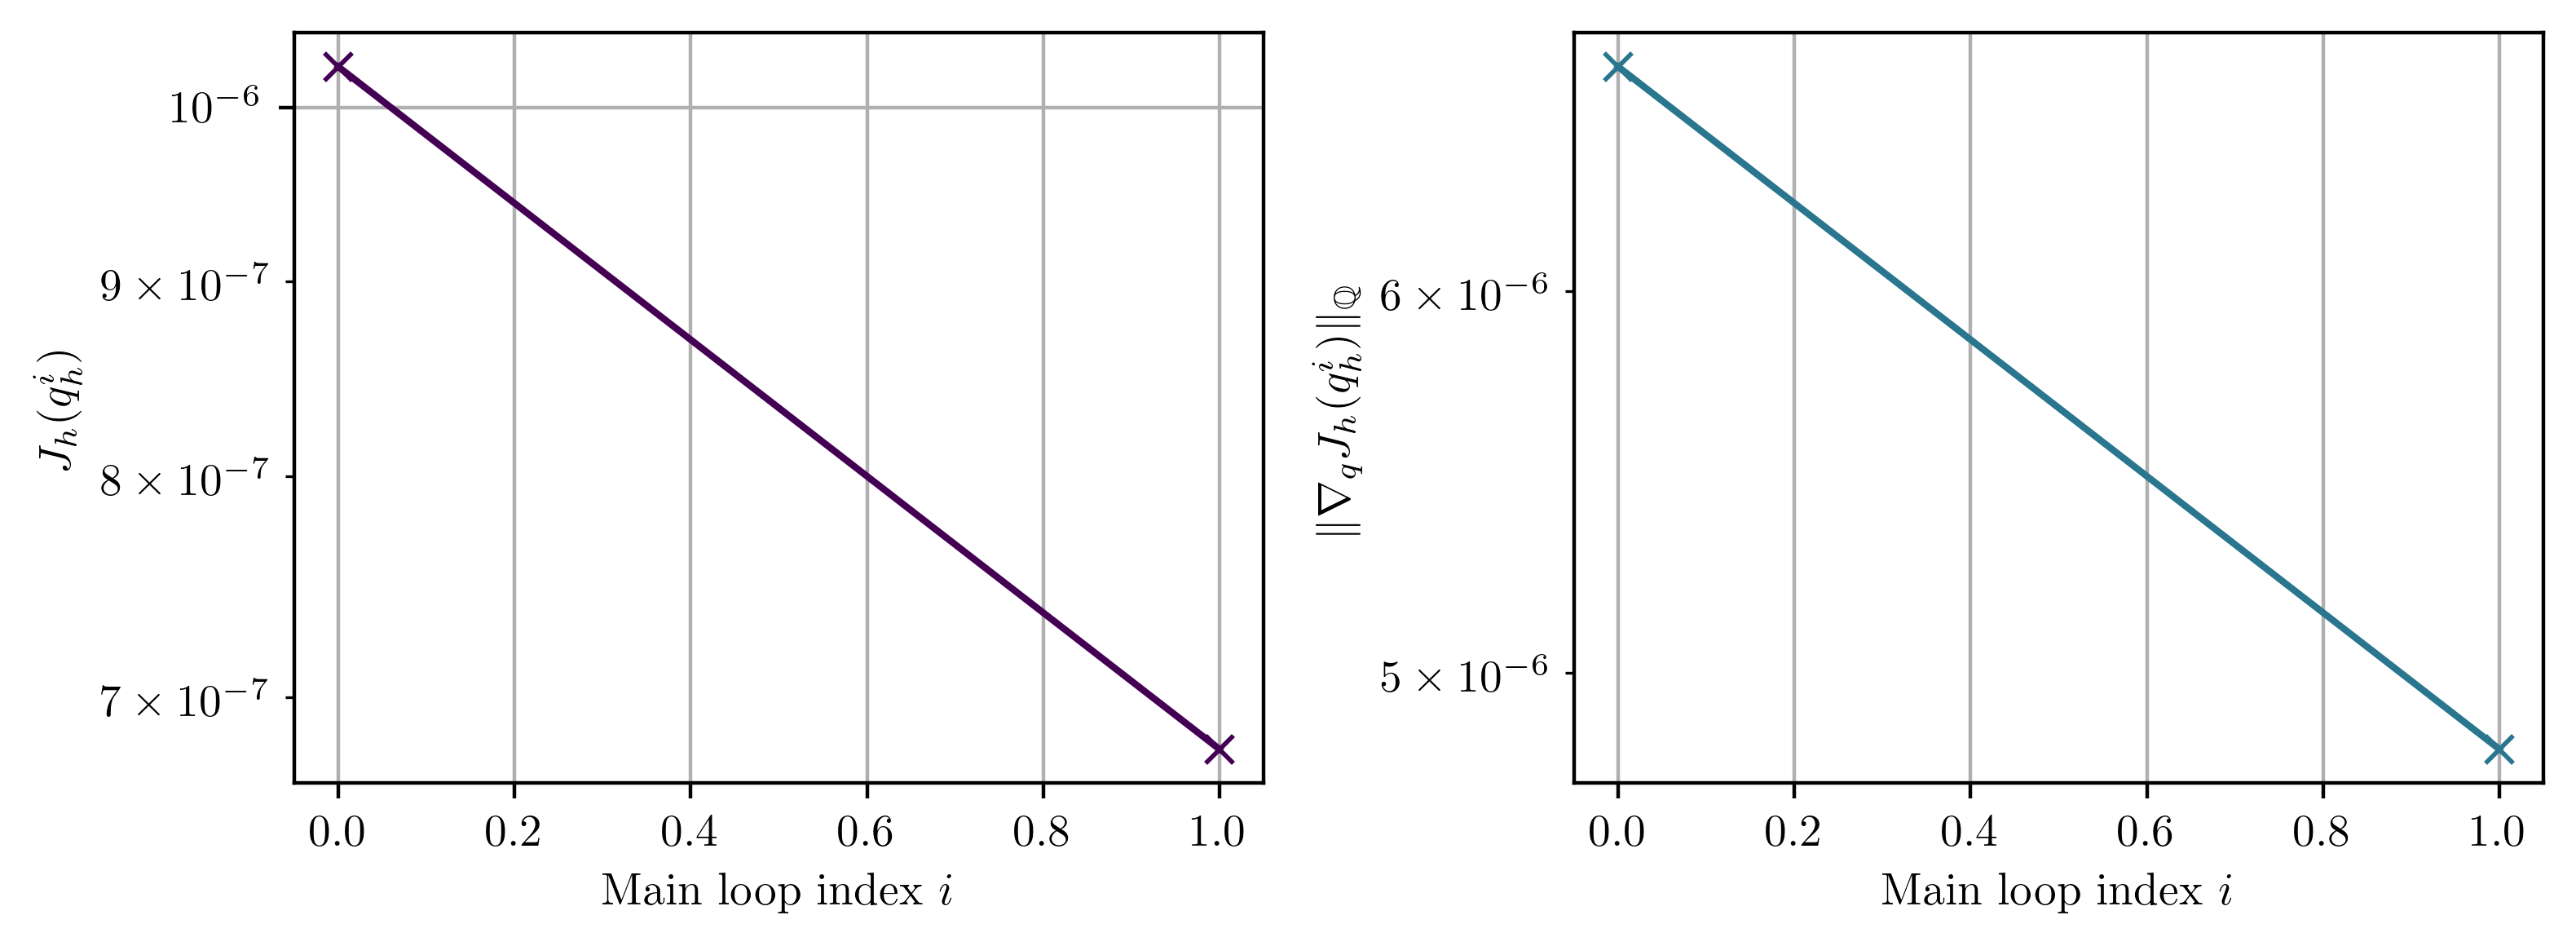

In [71]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,3))
cmap = plt.get_cmap('viridis')

Js = np.array(data['J'])
norm_nabla_Js = np.array(data['norm_nabla_J'])
assert len(Js) == len(norm_nabla_Js)

ax[0].set_xlabel(r'$\textrm{Main loop index } i$')
ax[0].set_ylabel(r'$J_h(q^i_h)$')
ax[0].set_yscale('log')
ax[0].grid()
ax[0].plot(Js, marker='x',color=cmap(0))

ax[1].set_xlabel(r'$\textrm{Main loop index } i$')
if setup['model_parameter']['q_time_dep']:
    ax[1].set_ylabel(r'$\|\nabla_q J_h(q^i_h)\|_{\mathbb{Q}^{K}}$')
else:
    ax[1].set_ylabel(r'$\|\nabla_q J_h(q^i_h)\|_{\mathbb{Q}}$')
    
ax[1].set_yscale('log')
ax[1].grid()
ax[1].plot(norm_nabla_Js, marker='x',color=cmap(100))
##############################


plt.tight_layout()
plt.show()

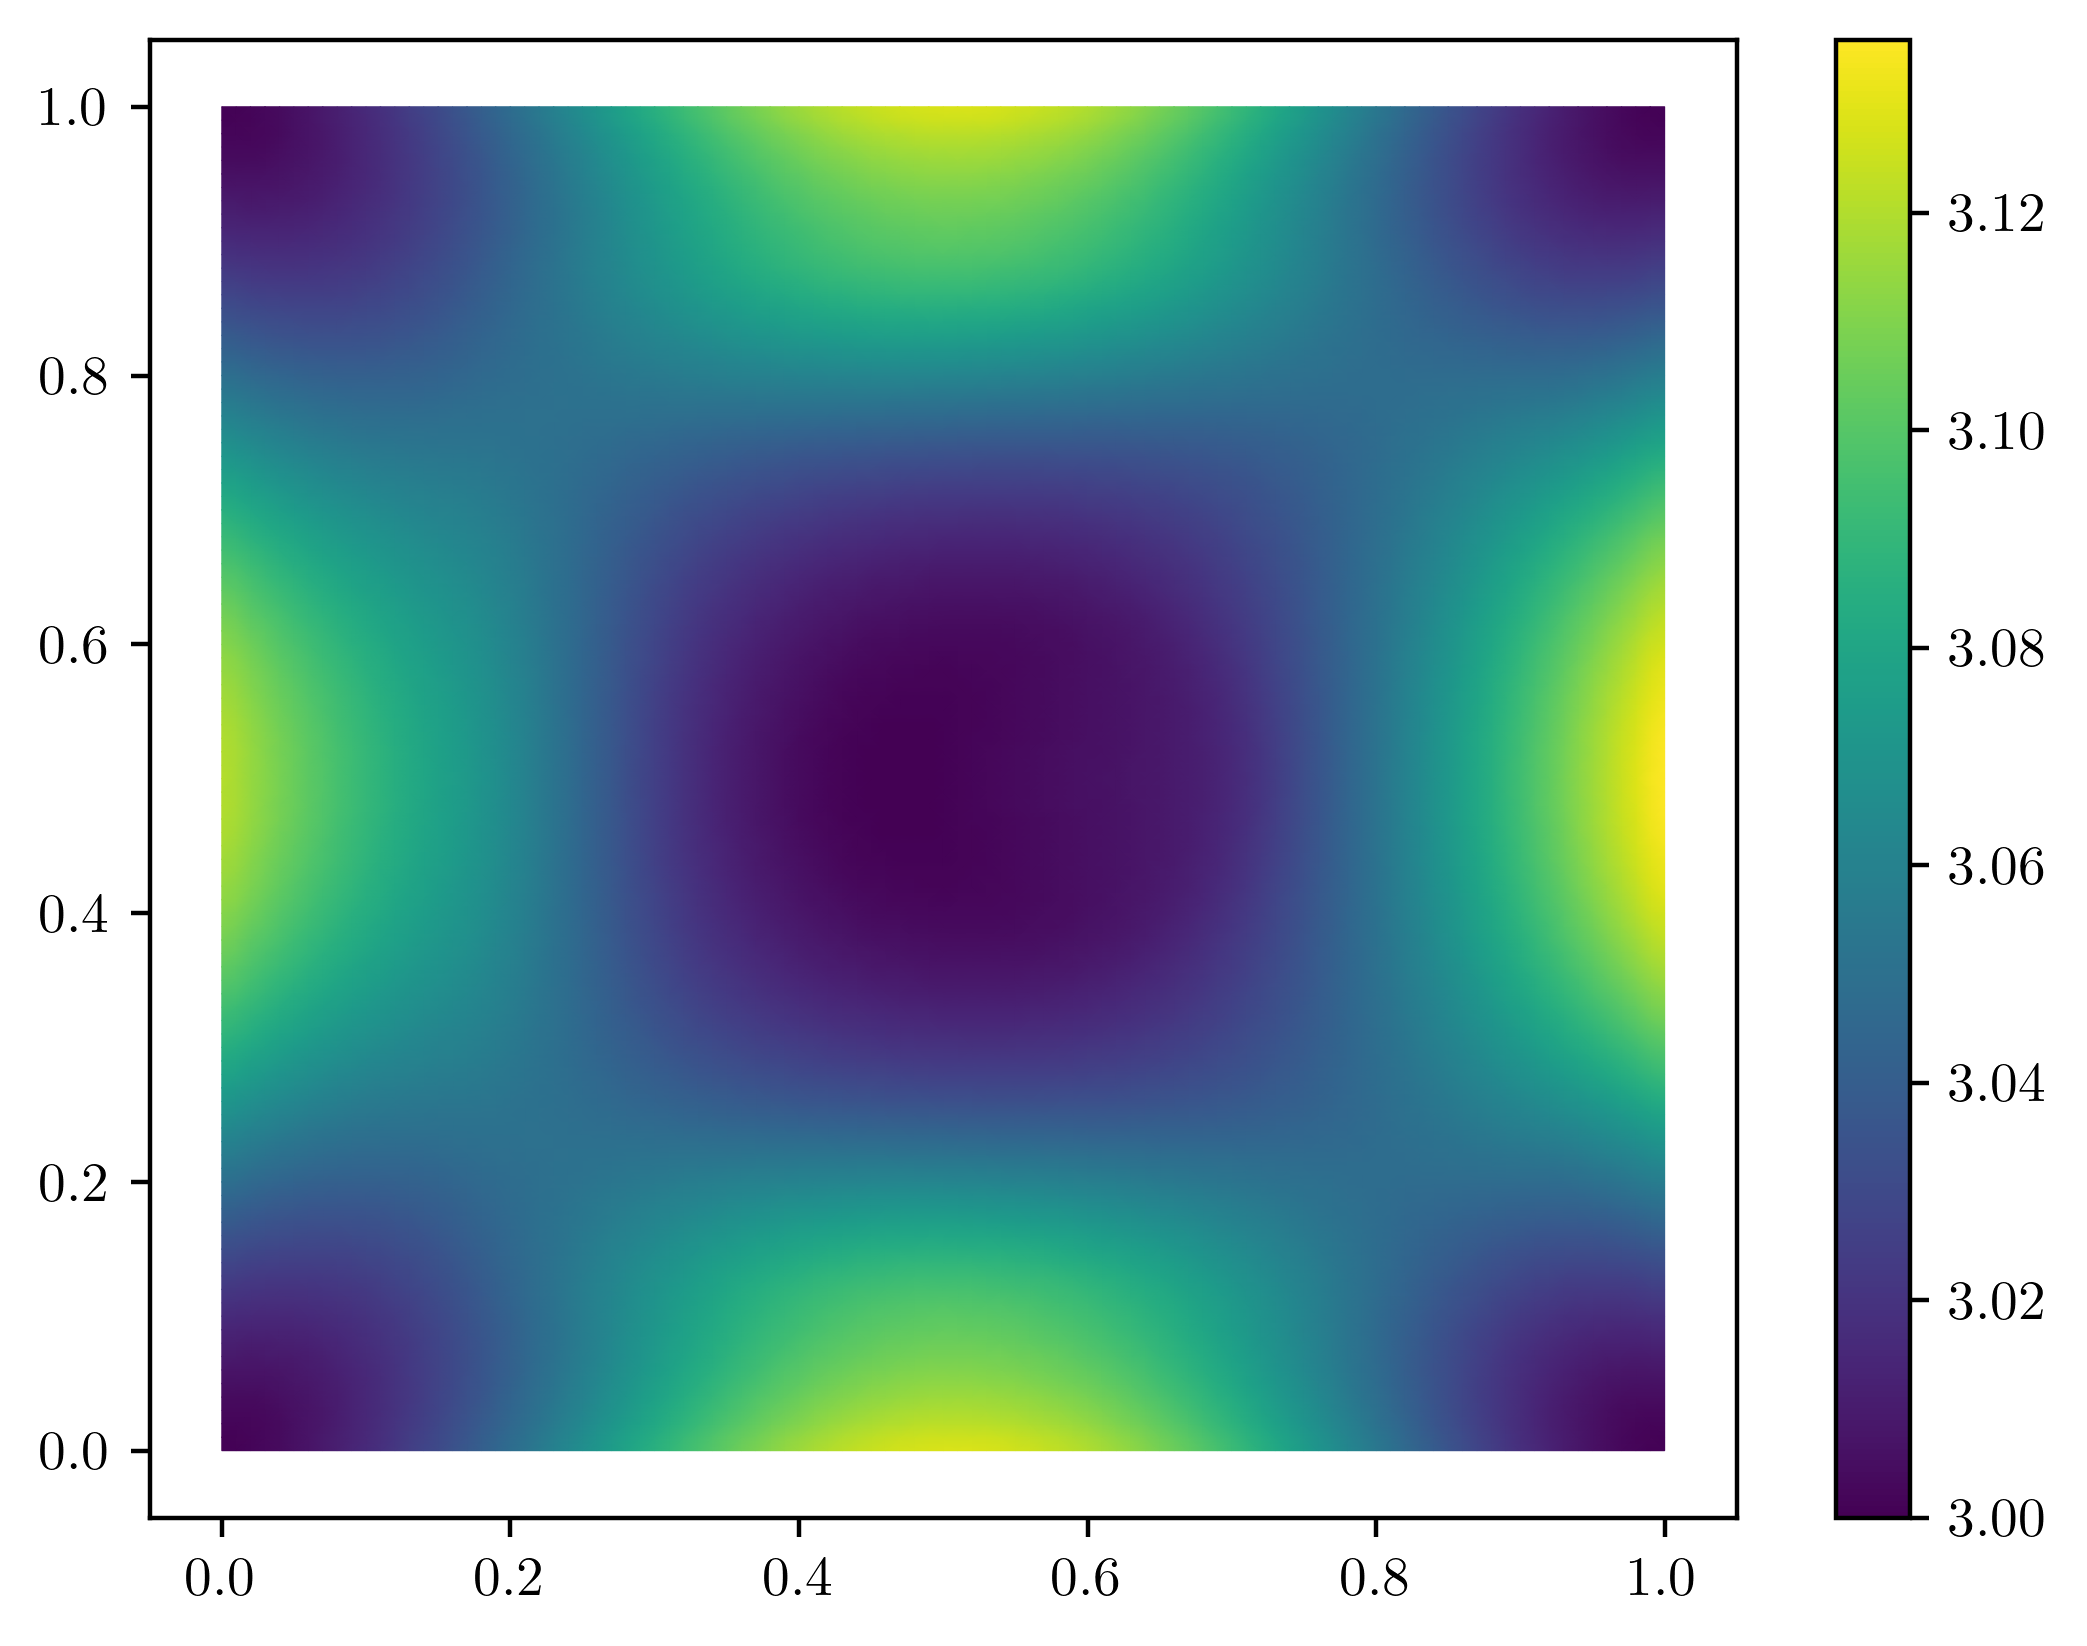

In [69]:
FOM.visualizer.visualize(data['q'][-1])

In [ ]:
u = FOM.solve_state(data['q'][-1])
FOM.visualizer.visualize(u)